#                              PCA for SP500

_For this project on analyzing every 3 months stock data of daily adjusted closed from 2000 to 2015,
For that firstly, I should cut the data into every 3 month worth (dropping any NAN value).
Then use PCA to find which are the TOP10 and BOTTOM10 stocks that really separate the days within the 3 months._ 

In [11]:
#Importing library packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import datetime as dt
import calendar #Python's program to get the month name from the month number
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [12]:
df= pd.read_csv("SP2000to2015.csv");
df.shape

(4025, 481)

In [13]:
df.isnull().sum () #gives the total number of null values 

Date       0
SPY        0
A          0
AA         0
AAPL       0
        ... 
XYL     2964
YHOO       0
YUM        0
ZION       0
FB      3114
Length: 481, dtype: int64

In [14]:
df=df.dropna(axis=1, how='any'); #drops columns with "NAN" for dropping rows with "NAN" axis=0 or by default it drops rows
df.shape
df.head(50)
#df.to_csv("NewDF_SP200.csv", sep='|') #creating a new dataframe in a file without any "NAN" values

,Date,SPY,A,AA,AAPL,ABC,ABT,ACE,ADBE,ADI,...,WY,X,XEL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
0,2000-01-03,110.33,46.874453,30.672069,3.755237,3.388149,9.877041,11.879322,16.274667,34.172261,...,16.489592,25.846668,9.125323,36.917808,27.225578,7.188536,19.785517,118.750000,7.635078,44.347670
1,2000-01-04,106.01,43.293758,30.814179,3.438625,3.156833,9.594841,11.788293,14.909395,32.443518,...,15.870126,24.881861,9.335446,36.078767,26.704098,7.188536,18.865260,110.750000,7.481609,42.200204
2,2000-01-05,106.20,40.608245,32.590553,3.488955,3.401760,9.577201,11.105573,15.204175,32.917146,...,16.710830,25.135758,9.695656,35.289081,28.159896,7.312809,19.836642,102.625000,7.519980,42.150263
3,2000-01-06,104.50,39.062035,32.164224,3.187025,3.660290,9.912315,11.697263,15.328291,32.017253,...,17.492537,25.288096,9.605603,32.229049,29.615693,7.322371,19.427639,92.046883,7.456039,42.749556
4,2000-01-07,110.57,42.317208,32.069484,3.337985,4.136540,10.018142,13.199247,16.072985,32.917146,...,16.917319,25.948227,9.605603,35.881345,29.528779,7.303247,19.887767,101.812500,7.289777,42.849438
5,2000-01-10,110.94,44.880659,31.974744,3.279277,4.245396,9.947595,13.608878,16.693563,35.782596,...,16.843573,25.745110,9.605603,37.707493,29.115941,7.475313,19.427639,109.015617,7.583922,42.075352
6,2000-01-11,109.62,44.270314,31.785264,3.111540,4.381467,9.806494,12.971673,15.545493,34.314349,...,16.666582,25.338875,9.605603,34.696817,29.202855,7.475313,19.223138,99.343750,7.532765,39.852974
7,2000-01-12,108.53,43.375143,31.501044,2.924932,4.381467,9.659735,13.426820,15.467916,35.427375,...,16.268354,24.526406,9.815726,34.696817,29.029028,7.312809,19.172012,89.390617,7.456039,40.202562
8,2000-01-13,110.00,44.026179,30.932604,3.245733,5.157072,9.571108,14.382627,16.290187,35.545782,...,16.179859,25.592772,9.785708,35.733279,29.702606,7.628263,19.683266,86.718750,7.571136,43.698437
9,2000-01-14,111.49,44.514454,30.316794,3.369434,4.830503,9.783802,14.974318,16.460841,38.411231,...,16.342100,25.084979,9.815726,38.052981,29.115941,7.532668,19.274263,88.250000,7.366511,44.447553


In [15]:
##Drop the rows with missing values, but we can't do it here, cause it'll delete some rows
#df.dropna(inplace=True)

In [16]:
df['datetime']= pd.to_datetime (df['Date'])
df=df.set_index('datetime')
df.head (5)

,Date,SPY,A,AA,AAPL,ABC,ABT,ACE,ADBE,ADI,...,WY,X,XEL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
datetime,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,110.33,46.874453,30.672069,3.755237,3.388149,9.877041,11.879322,16.274667,34.172261,...,16.489592,25.846668,9.125323,36.917808,27.225578,7.188536,19.785517,118.750000,7.635078,44.347670
2000-01-04,2000-01-04,106.01,43.293758,30.814179,3.438625,3.156833,9.594841,11.788293,14.909395,32.443518,...,15.870126,24.881861,9.335446,36.078767,26.704098,7.188536,18.865260,110.750000,7.481609,42.200204
2000-01-05,2000-01-05,106.20,40.608245,32.590553,3.488955,3.401760,9.577201,11.105573,15.204175,32.917146,...,16.710830,25.135758,9.695656,35.289081,28.159896,7.312809,19.836642,102.625000,7.519980,42.150263
2000-01-06,2000-01-06,104.50,39.062035,32.164224,3.187025,3.660290,9.912315,11.697263,15.328291,32.017253,...,17.492537,25.288096,9.605603,32.229049,29.615693,7.322371,19.427639,92.046883,7.456039,42.749556
2000-01-07,2000-01-07,110.57,42.317208,32.069484,3.337985,4.136540,10.018142,13.199247,16.072985,32.917146,...,16.917319,25.948227,9.605603,35.881345,29.528779,7.303247,19.887767,101.812500,7.289777,42.849438


In [17]:
#Extracting month and year from the datetime
df['month']=pd.DatetimeIndex(df['Date']).month
df['month_name']=pd.DatetimeIndex(df['Date']).strftime('%b')
df['Year']=pd.DatetimeIndex(df['Date']).year
df.head(10)
#df.describe




,Date,SPY,A,AA,AAPL,ABC,ABT,ACE,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION,month,month_name,Year
datetime,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,110.33,46.874453,30.672069,3.755237,3.388149,9.877041,11.879322,16.274667,34.172261,...,36.917808,27.225578,7.188536,19.785517,118.750000,7.635078,44.347670,1,Jan,2000
2000-01-04,2000-01-04,106.01,43.293758,30.814179,3.438625,3.156833,9.594841,11.788293,14.909395,32.443518,...,36.078767,26.704098,7.188536,18.865260,110.750000,7.481609,42.200204,1,Jan,2000
2000-01-05,2000-01-05,106.20,40.608245,32.590553,3.488955,3.401760,9.577201,11.105573,15.204175,32.917146,...,35.289081,28.159896,7.312809,19.836642,102.625000,7.519980,42.150263,1,Jan,2000
2000-01-06,2000-01-06,104.50,39.062035,32.164224,3.187025,3.660290,9.912315,11.697263,15.328291,32.017253,...,32.229049,29.615693,7.322371,19.427639,92.046883,7.456039,42.749556,1,Jan,2000
2000-01-07,2000-01-07,110.57,42.317208,32.069484,3.337985,4.136540,10.018142,13.199247,16.072985,32.917146,...,35.881345,29.528779,7.303247,19.887767,101.812500,7.289777,42.849438,1,Jan,2000
2000-01-10,2000-01-10,110.94,44.880659,31.974744,3.279277,4.245396,9.947595,13.608878,16.693563,35.782596,...,37.707493,29.115941,7.475313,19.427639,109.015617,7.583922,42.075352,1,Jan,2000
2000-01-11,2000-01-11,109.62,44.270314,31.785264,3.111540,4.381467,9.806494,12.971673,15.545493,34.314349,...,34.696817,29.202855,7.475313,19.223138,99.343750,7.532765,39.852974,1,Jan,2000
2000-01-12,2000-01-12,108.53,43.375143,31.501044,2.924932,4.381467,9.659735,13.426820,15.467916,35.427375,...,34.696817,29.029028,7.312809,19.172012,89.390617,7.456039,40.202562,1,Jan,2000
2000-01-13,2000-01-13,110.00,44.026179,30.932604,3.245733,5.157072,9.571108,14.382627,16.290187,35.545782,...,35.733279,29.702606,7.628263,19.683266,86.718750,7.571136,43.698437,1,Jan,2000


In [18]:
#Finding a correlation matrix to check the dependence of different features
corr=df.corr()
print (corr)

            SPY         A        AA      AAPL       ABC       ABT       ACE  \
SPY    1.000000  0.711046 -0.346563  0.900697  0.925813  0.931137  0.938848   
A      0.711046  1.000000 -0.149649  0.558340  0.533643  0.511910  0.521608   
AA    -0.346563 -0.149649  1.000000 -0.628277 -0.529068 -0.551917 -0.549297   
AAPL   0.900697  0.558340 -0.628277  1.000000  0.946017  0.953791  0.951248   
ABC    0.925813  0.533643 -0.529068  0.946017  1.000000  0.960641  0.948439   
...         ...       ...       ...       ...       ...       ...       ...   
YHOO   0.439393  0.680921  0.149438  0.186161  0.227960  0.196622  0.196504   
YUM    0.871110  0.490743 -0.658322  0.963620  0.904826  0.945521  0.961955   
ZION  -0.219283 -0.207546  0.775362 -0.518096 -0.372868 -0.408569 -0.370806   
month  0.033446 -0.100357 -0.094814  0.061535  0.055191  0.059416  0.069601   
Year   0.765383  0.349307 -0.688994  0.890995  0.825295  0.887745  0.912552   

           ADBE       ADI       ADM  ...       XEL 

In [19]:
#Tried to see what the first row of the dataframe looks like
features=df.iloc[:0]
print(features)

Empty DataFrame
Columns: [Date, SPY, A, AA, AAPL, ABC, ABT, ACE, ADBE, ADI, ADM, ADP, ADSK, AEE, AEP, AES, AET, AFL, AIG, AIV, AKAM, AKS, ALL, ALTR, AMAT, AMD, AMGN, AMT, AMZN, AN, ANF, AON, APA, APC, APD, APH, APOL, ARG, ASH, ATI, AVB, AVP, AVY, AXP, AZO, BA, BAC, BAX, BBBY, BBT, BBY, BC, BCR, BDX, BEN, BHI, BIG, BIIB, BK, BLK, BLL, BMS, BMY, BRCM, BSX, BWA, BXP, C, CA, CAG, CAH, CAM, CAT, CB, CCE, CCL, CCU, CELG, CERN, CHK, CHRW, CI, CIEN, CINF, CL, CLF, CLX, CMA, CMCSA, CMI, CMS, CNP, CNX, COF, COG, COP, COST, CPB, CSC, CSCO, ...]
Index: []

[0 rows x 416 columns]


In [20]:
X = df.iloc[:,2:413].values #selecting values/features that are needed
#y = df.ix[:,4].values #not needed here
print(X)

[[ 46.874453  30.672069   3.755237 ... 118.75       7.635078  44.34767 ]
 [ 43.293758  30.814179   3.438625 ... 110.75       7.481609  42.200204]
 [ 40.608245  32.590553   3.488955 ... 102.625      7.51998   42.150263]
 ...
 [ 42.244484  10.13     108.739998 ...  34.040001  74.239998  27.809999]
 [ 42.054999   9.96     107.32     ...  33.369999  73.809998  27.469999]
 [ 41.810001   9.87     105.260002 ...  33.259998  73.050003  27.299999]]


## Standarization of the dataframe

In [21]:
#Standarizing data of dataframe X
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std)


[[ 2.00182862  1.32295752 -0.78358653 ...  6.22875299 -1.13059754
   0.3078429 ]
 [ 1.66969367  1.33972974 -0.79225617 ...  5.69565774 -1.13704672
   0.18879672]
 [ 1.42059323  1.54938237 -0.79087801 ...  5.15423288 -1.13543427
   0.1860282 ]
 ...
 [ 1.57236604 -1.10147491  2.09116309 ...  0.58394074  1.66832093
  -0.60893374]
 [ 1.55478996 -1.12153879  2.05227993 ...  0.53929388  1.65025117
  -0.62778186]
 [ 1.53206465 -1.13216084  1.99587195 ...  0.53196375  1.61831413
  -0.63720592]]


## PCA Algorithm and projection in 2D

      principal component 1  principal component 2
0               -606.954254            -229.278793
1               -565.780192            -187.165103
2               -550.303653            -201.951943
3               -578.828807            -211.513698
4               -625.633901            -277.937102
...                     ...                    ...
4020            1449.224464            -572.967227
4021            1450.855544            -574.245650
4022            1476.541186            -598.695781
4023            1464.993575            -588.259819
4024            1448.202231            -572.287410

[4025 rows x 2 columns]


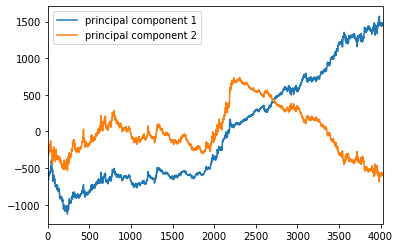

In [23]:
#fitting the PCA algorithm with our Dataset
pca = PCA().fit(X_std)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#Plotting the Cumulative Summation of the Explained Variance
#plt.figure()
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('Number of Components')
#plt.ylabel ('Variance (%)') #for each component
#plt.title ('SP Dataset Explained Variance')
print(principalDf)
principalDf.plot()

In [16]:
#print(A.min(), A.max())

In [17]:
#A.nlargest(3)

In [18]:
var= pca.explained_variance_
print(pca.explained_variance_)


[2.56676493e+02 4.69613173e+01 4.12926640e+01 2.25590636e+01
 8.55452991e+00 6.15399645e+00 4.15381684e+00 3.10572637e+00
 2.73644354e+00 2.33699728e+00 1.59002674e+00 1.52429416e+00
 1.24790456e+00 1.04174680e+00 9.62691085e-01 7.24099737e-01
 6.82116738e-01 5.78215256e-01 5.49991120e-01 4.78283508e-01
 4.41914144e-01 4.13905278e-01 3.85217326e-01 3.27777493e-01
 3.18913057e-01 2.98295850e-01 2.74267598e-01 2.55891265e-01
 2.24833735e-01 2.02919953e-01 1.91032514e-01 1.86822022e-01
 1.76397218e-01 1.75251268e-01 1.60403767e-01 1.44568056e-01
 1.37173337e-01 1.35255892e-01 1.27099291e-01 1.17686979e-01
 1.06242477e-01 1.01892962e-01 9.93702698e-02 9.26325778e-02
 8.98508849e-02 8.47479210e-02 8.06557645e-02 7.79139522e-02
 7.50333592e-02 7.33903289e-02 6.90145015e-02 6.64452973e-02
 6.39089923e-02 6.24427794e-02 5.82019025e-02 5.34661238e-02
 5.09271418e-02 5.04326439e-02 4.76830670e-02 4.49657962e-02
 4.42868125e-02 4.27549145e-02 4.24156605e-02 4.02892574e-02
 3.97557632e-02 3.800312

In [19]:
var.size

412

In [20]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print (var1)

[62.28 73.68 83.7  89.17 91.25 92.74 93.75 94.5  95.16 95.73 96.12 96.49
 96.79 97.04 97.27 97.45 97.62 97.76 97.89 98.01 98.12 98.22 98.31 98.39
 98.47 98.54 98.61 98.67 98.72 98.77 98.82 98.87 98.91 98.95 98.99 99.03
 99.06 99.09 99.12 99.15 99.18 99.2  99.22 99.24 99.26 99.28 99.3  99.32
 99.34 99.36 99.38 99.4  99.42 99.44 99.45 99.46 99.47 99.48 99.49 99.5
 99.51 99.52 99.53 99.54 99.55 99.56 99.57 99.58 99.59 99.6  99.61 99.62
 99.63 99.64 99.65 99.66 99.67 99.68 99.69 99.7  99.71 99.72 99.73 99.74
 99.75 99.76 99.77 99.78 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.

In [39]:
##To change the postitions of columns 
##cols=df.columns.tolist()
##cols=cols[-1:]+cols[:-1]
#cols.index('dateconv')

In [40]:
#cols.index('dateconv')

In [41]:
#cols=cols[-1:]+cols[:-1]

In [42]:
#cols[2]

In [43]:
#cols[:2]

In [44]:
##cols=[cols[2]]+[cols[0]]+[cols[1]]+cols[2:]
 


In [45]:
#del cols[3]

In [46]:
#df1=df[cols]

In [21]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# Separating the dataset by year and every 3 months

In [48]:
#df_by_year = df.groupby('Year')
#df_by_year.head()
#df.loc['2000-01':'2000-03']
#df.head()

In [49]:
#search_year=['2000']
#df[df.Year.int.contains('|'.join (search_year))]


In [50]:
#search_month=['Jan','Feb','Mar']
#df[df.month_name.str.contains('|'.join(search_month)

In [51]:
dataframe_1=df.loc[(df['month_name'].isin(['Jan','Feb','Mar']))&(df['Year']==2000)]
dataframe_1.shape 
dataframe_1.to_csv("New Dataframe_1mo.csv", sep='|')
##Another way: df1=df[(df['month_name']=='Jan')]
#df1=df[df['month_name'].isin(['Jan','Feb','Mar'])];
#df2=df1[df1['Year']==2000];
#df2.shape

In [46]:
dataframe_1.head(63)

,Date,SPY,A,AA,AAPL,ABC,ABT,ACE,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION,month,month_name,Year
datetime,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,110.33,46.874453,30.672069,3.755237,3.388149,9.877041,11.879322,16.274667,34.172261,...,36.917808,27.225578,7.188536,19.785517,118.750000,7.635078,44.347670,1,Jan,2000
2000-01-04,2000-01-04,106.01,43.293758,30.814179,3.438625,3.156833,9.594841,11.788293,14.909395,32.443518,...,36.078767,26.704098,7.188536,18.865260,110.750000,7.481609,42.200204,1,Jan,2000
2000-01-05,2000-01-05,106.20,40.608245,32.590553,3.488955,3.401760,9.577201,11.105573,15.204175,32.917146,...,35.289081,28.159896,7.312809,19.836642,102.625000,7.519980,42.150263,1,Jan,2000
2000-01-06,2000-01-06,104.50,39.062035,32.164224,3.187025,3.660290,9.912315,11.697263,15.328291,32.017253,...,32.229049,29.615693,7.322371,19.427639,92.046883,7.456039,42.749556,1,Jan,2000
2000-01-07,2000-01-07,110.57,42.317208,32.069484,3.337985,4.136540,10.018142,13.199247,16.072985,32.917146,...,35.881345,29.528779,7.303247,19.887767,101.812500,7.289777,42.849438,1,Jan,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-03-27,2000-03-27,115.55,74.380635,27.403787,4.681992,3.252087,9.429314,13.472334,28.212211,66.686823,...,68.554592,26.749991,8.335643,22.252430,100.375000,6.074818,31.684364,3,Mar,2000
2000-03-28,2000-03-28,114.89,77.554430,27.047276,4.667310,3.252087,9.606561,13.836452,27.591480,61.761092,...,67.024576,27.618536,8.679775,22.084735,97.500000,6.036447,31.935429,3,Mar,2000
2000-03-29,2000-03-29,115.01,72.915807,27.427554,4.560377,3.265690,9.890149,13.917024,27.653553,65.360665,...,63.520346,28.142938,8.430842,22.084735,88.531250,5.934134,31.747127,3,Mar,2000


,SPY,A,AA,AAPL,ABC,ABT,ACE,ADBE,ADI,ADM,...,XEL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION,month,Year
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0
mean,107.972540,60.947730,27.389207,3.863574,3.614073,9.413544,12.742548,20.409281,49.610278,7.622082,...,9.034794,50.028510,27.603617,7.784914,18.901458,88.206100,6.188901,39.451909,2.047619,2000.0
std,3.840693,17.069371,2.200454,0.430841,0.551106,0.453880,1.297091,4.350420,12.306466,0.698003,...,0.530064,11.855786,1.262874,0.379896,1.893906,8.416819,0.684345,5.674034,0.831411,0.0
min,101.140000,39.062035,23.292031,2.924932,2.612552,8.401309,10.695941,13.668238,32.017253,6.228486,...,7.804553,32.229049,24.843572,7.131181,16.462368,76.906250,5.256317,29.274143,1.000000,2000.0
25%,105.175000,44.819624,25.858908,3.569672,3.252087,9.101416,11.833807,15.863537,37.333727,7.044636,...,8.765113,37.238617,26.624356,7.503991,17.514175,82.367184,5.716723,33.416711,1.000000,2000.0
50%,107.020000,53.303411,27.023509,3.826523,3.469800,9.535661,12.698585,20.665266,48.310057,7.688962,...,9.155341,51.526994,27.442861,7.723858,18.098380,86.007797,6.036447,41.550971,2.000000,2000.0
75%,110.590000,74.217878,28.223761,4.111676,4.075311,9.748352,13.608878,24.380983,61.062490,8.106080,...,9.440507,60.781123,28.866066,7.991511,19.862205,91.125000,6.400934,43.886108,3.000000,2000.0
max,116.790000,103.514409,32.590553,4.837142,5.157072,10.226911,16.755364,28.212211,69.718043,9.154093,...,9.815726,68.554592,29.746062,8.699090,24.561528,118.750000,7.635078,48.003569,3.000000,2000.0


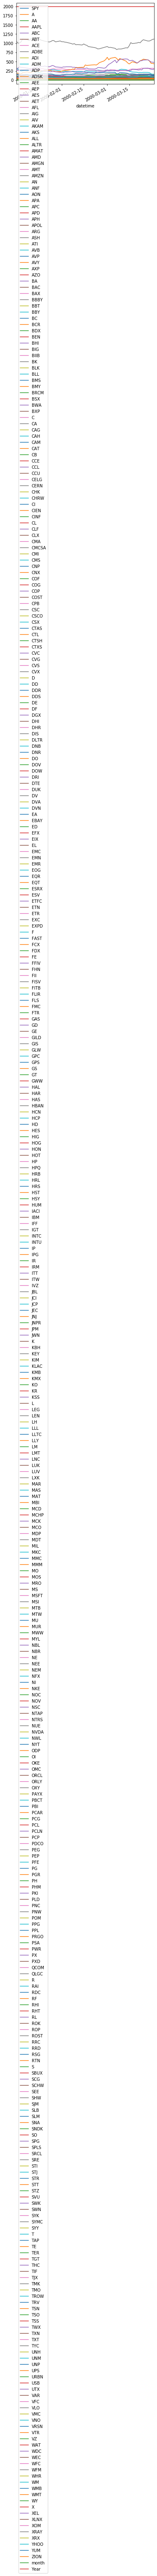

In [47]:
dataframe_1.plot()
dataframe_1.describe()

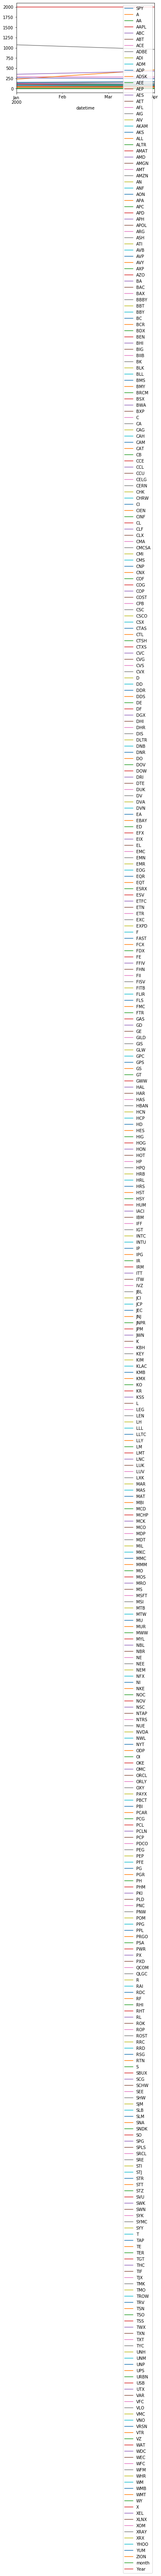

In [48]:
dataframe_1.resample('3M').median().plot()
plt.show()

In [49]:
dataframe_2=df.loc[(df['month_name'].isin(['Apr','May','Jun']))&(df['Year']==2000)]
dataframe_2.shape 

(63, 416)

In [50]:
dataframe_2.head(63)

,Date,SPY,A,AA,AAPL,ABC,ABT,ACE,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION,month,month_name,Year
datetime,,,,,,,,,,,,,,,,,,,,,
2000-04-03,2000-04-03,115.03,63.801332,27.284950,4.472314,3.184047,10.492771,16.480686,26.210348,56.219644,...,61.299354,28.142938,8.392517,20.691539,80.06250,6.202701,32.136281,4,Apr,2000
2000-04-04,2000-04-04,114.17,60.871683,26.880905,4.271034,3.388149,11.184021,15.977109,25.263740,53.804142,...,60.879834,28.842142,8.411675,20.949539,83.68750,6.381756,33.441817,4,Apr,2000
2000-04-05,2000-04-05,113.46,63.109612,26.310488,4.373769,3.497005,10.528225,15.977109,26.613835,55.307916,...,66.037469,27.880737,8.430842,21.052738,82.78125,6.599166,33.040113,4,Apr,2000
2000-04-06,2000-04-06,114.45,68.358573,26.975974,4.199739,3.660290,10.723186,15.427753,28.460503,59.724492,...,63.816478,28.579940,8.464366,22.600734,77.00000,6.458482,34.144798,4,Apr,2000
2000-04-07,2000-04-07,115.17,79.426154,25.835140,4.419899,3.646687,10.386425,15.565092,31.036535,59.866580,...,64.704874,27.815187,8.526641,22.910333,75.56250,6.471275,32.638410,4,Apr,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-06-26,2000-06-26,111.48,48.908927,22.046344,3.631527,6.517776,11.703269,19.273246,30.958950,68.439247,...,68.752014,29.300771,9.522822,16.480369,59.65625,5.614411,38.520751,6,Jun,2000
2000-06-27,2000-06-27,110.65,49.112382,22.857573,3.472178,6.109557,11.845775,19.502145,29.314002,64.981763,...,66.382956,28.844918,9.158039,15.908495,62.96875,5.601618,38.419647,6,Jun,2000
2000-06-28,2000-06-28,110.96,51.757201,22.642836,3.652493,6.463348,12.121884,20.149885,30.989975,63.241174,...,68.110394,28.866886,9.638017,16.636335,61.78125,5.588825,38.318543,6,Jun,2000


In [51]:
dataframe_3=df.loc[(df['month_name'].isin(['Jul','Aug','Sep']))&(df['Year']==2000)]
dataframe_3.shape 

(63, 416)

In [52]:
dataframe_4=df.loc[(df['month_name'].isin(['Oct','Nov','Dec']))&(df['Year']==2000)]
dataframe_4.shape 

(63, 416)

In [53]:
dataframe_5=df.loc[(df['month_name'].isin(['Jan','Feb','Mar']))&(df['Year']==2001)]
dataframe_5.shape 

(62, 416)

In [54]:
dataframe_6=df.loc[(df['month_name'].isin(['Apr','May','Jun']))&(df['Year']==2001)]
dataframe_6.shape 

(63, 416)

In [55]:
dataframe_7=df.loc[(df['month_name'].isin(['Jul','Aug','Sep']))&(df['Year']==2001)]
dataframe_7.shape

(59, 416)

In [56]:
dataframe_8=df.loc[(df['month_name'].isin(['Oct','Nov','Dec']))&(df['Year']==2001)]
dataframe_8.shape 

(64, 416)

In [57]:
dataframe_9=df.loc[(df['month_name'].isin(['Jan','Feb','Mar']))&(df['Year']==2002)]
dataframe_9.shape 

(60, 416)

In [58]:
dataframe_10=df.loc[(df['month_name'].isin(['Apr','May','Jun']))&(df['Year']==2002)]
dataframe_10.shape 

(64, 416)

In [59]:
dataframe_11=df.loc[(df['month_name'].isin(['Jul','Aug','Sep']))&(df['Year']==2002)]
dataframe_11.shape

(64, 416)

In [60]:
dataframe_12=df.loc[(df['month_name'].isin(['Oct','Nov','Dec']))&(df['Year']==2002)]
dataframe_12.shape 

(64, 416)

In [61]:
dataframe_13=df.loc[(df['month_name'].isin(['Jan','Feb','Mar']))&(df['Year']==2003)]
dataframe_13.shape 

(61, 416)

In [62]:
dataframe_14=df.loc[(df['month_name'].isin(['Apr','May','Jun']))&(df['Year']==2003)]
dataframe_14.shape 

(63, 416)

In [63]:
dataframe_15=df.loc[(df['month_name'].isin(['Jul','Aug','Sep']))&(df['Year']==2003)]
dataframe_15.shape

(64, 416)

In [64]:
dataframe_16=df.loc[(df['month_name'].isin(['Oct','Nov','Dec']))&(df['Year']==2003)]
dataframe_16.shape 

(64, 416)

In [65]:
dataframe_17=df.loc[(df['month_name'].isin(['Jan','Feb','Mar']))&(df['Year']==2004)]
dataframe_17.shape 

(62, 416)

In [66]:
dataframe_18=df.loc[(df['month_name'].isin(['Apr','May','Jun']))&(df['Year']==2004)]
dataframe_18.shape

(62, 416)

In [67]:
dataframe_19=df.loc[(df['month_name'].isin(['Jul','Aug','Sep']))&(df['Year']==2004)]
dataframe_19.shape

(64, 416)

In [68]:
dataframe_20=df.loc[(df['month_name'].isin(['Oct','Nov','Dec']))&(df['Year']==2004)]
dataframe_20.shape 

(64, 416)

In [69]:
dataframe_21=df.loc[(df['month_name'].isin(['Jan','Feb','Mar']))&(df['Year']==2005)]
dataframe_21.shape 

(61, 416)

In [70]:
dataframe_22=df.loc[(df['month_name'].isin(['Apr','May','Jun']))&(df['Year']==2005)]
dataframe_22.shape

(64, 416)

In [71]:
dataframe_23=df.loc[(df['month_name'].isin(['Jul','Aug','Sep']))&(df['Year']==2005)]
dataframe_23.shape

(64, 416)

In [72]:
dataframe_24=df.loc[(df['month_name'].isin(['Oct','Nov','Dec']))&(df['Year']==2005)]
dataframe_24.shape

(63, 416)